In [7]:
import os
os.environ["NUMBA_PARFOR_MAX_TUPLE_SIZE"] = "200"
import sys
sys.path.append("..")
sys.path.insert(0,'..')

import numpy as np
import matplotlib.pyplot as plt   
from IHANKModel import HANKModelClass
import utils
import figs
import GetForeignEcon
import numba as nb
nb.set_num_threads(4)

In [2]:
model = HANKModelClass(name='baseline')

# HH model type
# model.par.HH_type = 'RA-IM'
model.par.HH_type = 'HA'

In [10]:
model.find_ss(do_print=True)
assert abs(model.ss.Walras) < 1e-07
if model.par.HH_type == 'HA':
    utils.print_MPCs(model, do_print=True)

Solving calibration:
On iteration 0
x = 0.138,0.143,1.660,1.651,0.180
y = 0.000,-0.000,0.000,0.000,0.000


Solving HA calibration:
On iteration 0
x = 0.972,0.023
y = -0.000,0.000


Implied G/GDP =  0.170
Implied Exports/GDP =  0.360
Implied Imports/GDP =  0.360
Implied A/GDP =  7.905
Implied NX/GDP =  0.000
Implied C/GDP =  0.830
Goods market eq. residual =   0.00000000
Goods market NT =  -0.00000000
Goods market T =   0.00000000
Walras =   0.00000001
mean MPC: 0.461 [annual: 0.549], std of ann. MPCs: 0.431


In [9]:
#print(model)

### Jacobians 

In [5]:
if model.par.HH_type == 'HA':
    model.compute_jacs(do_print=True,skip_shocks=True,skip_hh=False)
else:
    model.compute_jacs(do_print=True,skip_shocks=True,skip_hh=True)

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for LT              in 2.0 secs
curly_Y and curly_D calculated for UniformT        in 2.1 secs
curly_Y and curly_D calculated for eps_beta        in 2.1 secs
curly_Y and curly_D calculated for ra              in 2.1 secs
curly_Y and curly_D calculated for wnNT            in 1.5 secs
curly_Y and curly_D calculated for wnT             in 1.0 secs
curly_E calculated in 4.3 secs
builiding blocks combined in 1.6 secs
household Jacobian computed in 16.6 secs

full Jacobians:
full Jacobian to unknowns computed in 2.0 mins 49 secs [in evaluate_path(): 2.0 mins 48 secs]


# Compare HANK and RANK - PE

<Figure size 316.8x417.6 with 0 Axes>

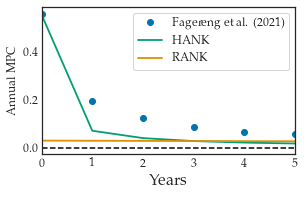

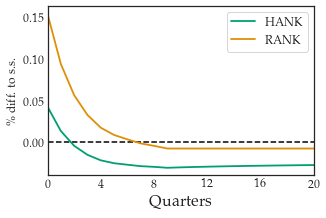

In [6]:
MPC_fig = figs.plot_MPCs(model, lin=False, show_all=False, do_ann_mpc=True) 
dC_dr_fig = figs.PE_MonPol_shock(model, lin=False)

# Foreign demand shock

finding the transition path:
 it =   0 -> max. abs. error = 1.18e-01
   3.99e-02 in goods_mkt_T
   2.78e-02 in goods_mkt_NT
   1.18e-01 in NKWPCT
   1.75e-02 in NKWPCNT
   3.51e-03 in Taylor
   1.37e-02 in G_budget
 it =   1 -> max. abs. error = 1.52e-02
   7.03e-04 in goods_mkt_T
   4.62e-04 in goods_mkt_NT
   1.52e-02 in NKWPCT
   5.72e-04 in NKWPCNT
   1.62e-05 in Taylor
   8.38e-05 in G_budget
 it =   2 -> max. abs. error = 7.34e-03
   2.46e-04 in goods_mkt_T
   2.68e-04 in goods_mkt_NT
   7.34e-03 in NKWPCT
   8.55e-04 in NKWPCNT
   7.45e-06 in Taylor
   3.82e-05 in G_budget
 it =   3 -> max. abs. error = 5.87e-04
   4.45e-05 in goods_mkt_T
   4.78e-05 in goods_mkt_NT
   5.87e-04 in NKWPCT
   4.08e-05 in NKWPCNT
   3.54e-07 in Taylor
   3.05e-06 in G_budget
 it =   4 -> max. abs. error = 5.43e-05
   1.65e-06 in goods_mkt_T
   4.06e-06 in goods_mkt_NT
   5.43e-05 in NKWPCT
   2.31e-05 in NKWPCNT
   7.65e-08 in Taylor
   3.66e-07 in G_budget
 it =   5 -> max. abs. error = 3.31e-06
 

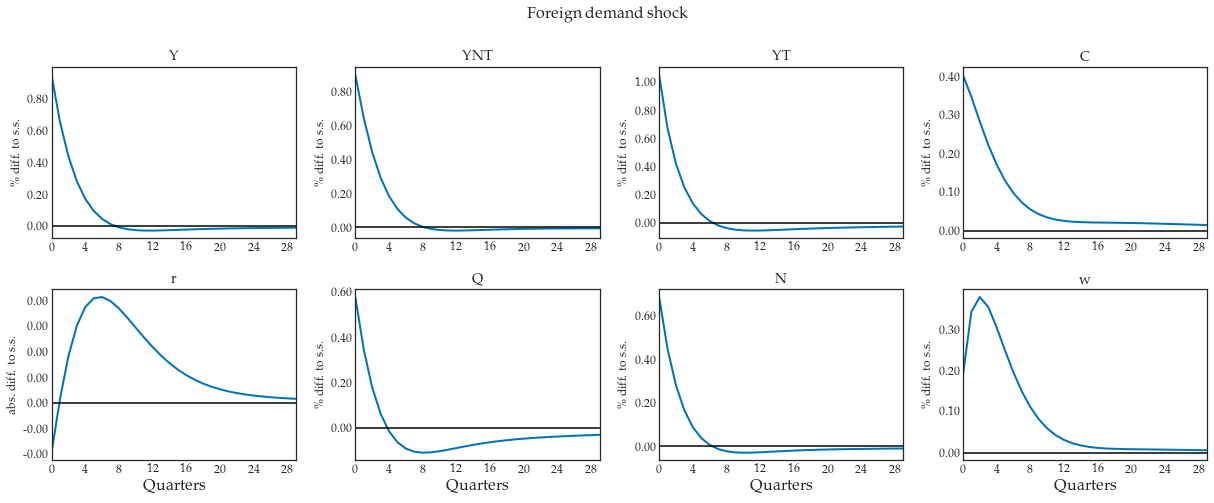

In [8]:
model_foreign = GetForeignEcon.get_foreign_econ(shocksize=-0.01)
GetForeignEcon.create_foreign_shock(model, model_foreign)

model.transition_path(do_print=True)
utils.scaleshock('C_s', model,0.01)

abs_value = ['r']
paths = ['Y','YNT','YT','C', 'r', 'Q', 'N', 'w'] 
_ = figs.show_IRFs_new([model], paths,abs_value=abs_value,T_max=30, shocktitle='Foreign demand shock', do_sumplot=False, scale=True, lwidth=2.)